# Lecture 5 –Fall 2024

A demonstration of advanced `pandas` syntax to accompany Lecture 4.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

## Dataset: California baby names

In today's lecture, we'll work with the `babynames` dataset, which contains information about the names of infants born in California.

The cell below pulls census data from a government website and then loads it into a usable form. The code shown here is outside of the scope of Data 100, but you're encouraged to dig into it if you are interested!

In [2]:
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # If the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.head()

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


## Case Study: Name "Popularity"

#**Case Study Question**
**Title**: Identifying the Most Consistently Popular Female Baby Name Over Time

Objective:
In this exercise, we will analyze the dataset to find the female baby name that has shown the most consistent popularity over the years. This involves filtering the data, calculating the consistency of name counts, and determining the most stable name.



# Instructions:

**Data** Preparation:

Filter the dataset to only include entries where the sex is "F" (female).
Calculate Consistency:

For each name, calculate the standard deviation of the counts over the years. A lower standard deviation indicates more consistent popularity.
**Identify Most Consistent Name:**

Determine the name with the lowest standard deviation in counts, signifying the most consistent popularity.


In [3]:
#Answer Here
babynames_f=babynames[babynames['Sex']=='F']
babynames_f_std=babynames_f.groupby(['Name'])[['Count']].agg('std')

In [4]:
babynames_f_std

,Count
Name,
Aadhini,NaN
Aadhira,1.923538
Aadhya,14.629715
Aadya,7.727656
Aahana,5.539568
...,...
Zyanya,2.619603
Zyla,8.059190
Zylah,4.102845


In [5]:
babynames_f_std=babynames_f_std[babynames_f_std['Count']==babynames_f_std['Count'].min()]
babynames_f_std

,Count
Name,
Aaleah,0.0
Abbe,0.0
Abbigayle,0.0
Abeer,0.0
Abelina,0.0
...,...
Zelena,0.0
Zelia,0.0
Zenaya,0.0


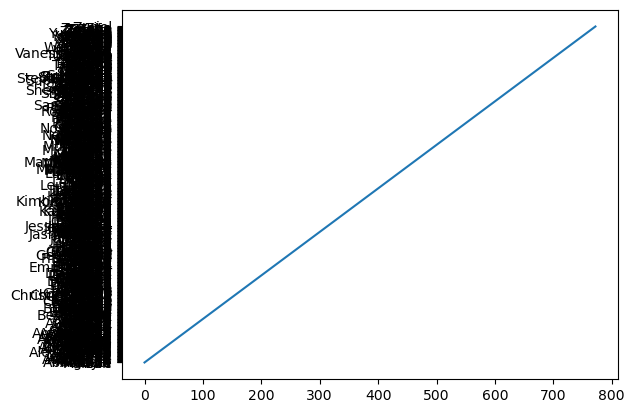

In [6]:
plt.plot(babynames_f_std.index)